# DHSI Day 3 - Part 2

Outline

Goal: add Optical Character Recognition to analysis

* one
* two
* three

## OCR with Tesseract

### Direct use of Tesseract

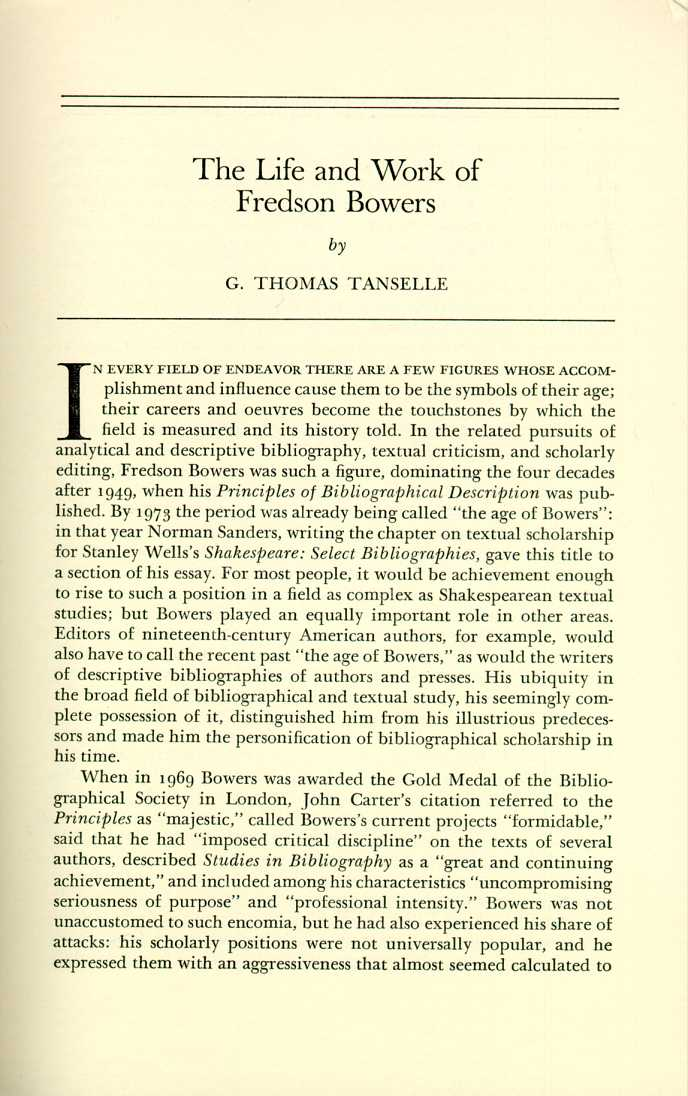

In [1]:
from IPython.display import Image as Img
Img(filename='sample_text.jpg')

In [2]:
! tesseract sample_text.jpg stdout

 

 

The Life and Work of
Fredson Bowers

by
G. THOMAS TANSELLE

 

N rvesr new or cunravor rum are a raw rrnuecs wnosc Accolvl»
plishinenr and inﬂuence cause them to bc rhe symbols oi rheir age;
iheir careers and oeuvres become the tullchstunes by which lhe
ﬁeld is measured and iLs hisiory sold. in she related pursuils oi

analyrical and descripiive bibliography, textual crilirism, and scholarly
ediring. Frcdson Bowers was such a ﬁglu'c. dominaung rhe four decades
aher i949, when his Principlz: of Bibliogmphilrzll Descripnon was pub-
lished. By X973 she period was already being called “die age ol Bowers”:
in char year Norman Sanders, wriiing the chaprer on Lexlnal scholarship
for Sranley Wells's Shllhe'symre: Select Bioliographier, gave rhis ride lo
a secrion of his essay. For rnosi people. is would he achievernenr enough
to rise to such a posirion in a iield as complex as Shakespearean textual
surdies; but Bowers played an equally imporram role in olher areas.
Edirors oi ninereenihc

In [3]:
! tesseract sample_text.jpg output
! head output.txt

Tesseract Open Source OCR Engine v3.03 with Leptonica
 

 

The Life and Work of
Fredson Bowers

by
G. THOMAS TANSELLE



### Use tesseract in Python with pytesseract

## Beautiful Soup demo

In [ ]:
from bs4 import BeautifulSoup

f=open("shorter_example")
soup = BeautifulSoup(f,"lxml")
f.close()

taglist = soup.find_all("text")

print(soup.prettify())

### Search for occurences of term in single file

In [8]:
from bs4 import BeautifulSoup
import Image
from cStringIO import StringIO
import pytesseract

def process_file(f):
    
    output_list=[]
    
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist: 
        pageinfo=tagtxt.find_all("pg")
        
# check if search term occurs in text tag
        termfound=False
        words=tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                print("FOUND")

# if yes, scan the text in tag
        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox) # convert 4 strings to 4 integers
                pagenumber=p["pgref"]
                imagefile=f.name.strip(".xml")+"-"+pagenumber.zfill(3)+".jpg"
                im = Image.open(imagefile)
                im_cropped = im.crop(textbox)  

#                im_cropped.save("test2.jpg")
                textOCR = pytesseract.image_to_string(im_cropped)
                print(imagefile,textbox)
                print(textOCR.count(searchterm))
                output_list.append([imagefile,textbox ])
            
    return output_list


searchterm = "Somme"
f=open("0FFO-1916-SEP29.xml")
output_list=process_file(f)
f.close()
print(output_list)

FOUND
FOUND
FOUND
('0FFO-1916-SEP29-006.jpg', [1663, 149, 2446, 851])
0
('0FFO-1916-SEP29-006.jpg', [1666, 860, 2443, 6257])
7
[['0FFO-1916-SEP29-006.jpg', [1663, 149, 2446, 851]], ['0FFO-1916-SEP29-006.jpg', [1666, 860, 2443, 6257]]]


In [7]:
from bs4 import BeautifulSoup
import Image
from cStringIO import StringIO
import pytesseract

def process_file(f):
    
    output_list=[]
    
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist: 
        pageinfo=tagtxt.find_all("pg")
        
# check if search term occurs in text tag
        termfound=False
        words=tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                print("FOUND")

        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox) # convert 4 strings to 4 integers
                pagenumber=p["pgref"]
                imagefile=f.name.strip(".xml")+"-"+pagenumber.zfill(3)+".jpg"
                output_list.append([imagefile,textbox ])
            
    return output_list

def process_image_file(fim):
    
    list_of_boxes=[]
    for element in output_list:
        if element[0]==fim.name:
            list_of_boxes.append(element[1])
    
    totalfound=0
    if( len(list_of_boxes)>0 ):
        im = Image.open(fim)
        
        for box in list_of_boxes:
            im_cropped = im.crop(box)
            textOCR = pytesseract.image_to_string(im_cropped)
            totalfound=totalfound+textOCR.count("Somme")
            
    return totalfound
            
searchterm = "Somme"
f=open("0FFO-1916-SEP29.xml")
output_list=process_file(f)
f.close()
print(output_list)


file_image=open("0FFO-1916-SEP29-006.jpg","r")
result=process_image_file(file_image)
file_image.close()

print("total found is ",result)


FOUND
FOUND
FOUND
[['0FFO-1916-SEP29-006.jpg', [1663, 149, 2446, 851]], ['0FFO-1916-SEP29-006.jpg', [1666, 860, 2443, 6257]]]
('total found is ', 7)


In [10]:
import findspark
import os
findspark.init()

import pyspark
sc = pyspark.SparkContext()

In [18]:
from bs4 import BeautifulSoup
import Image
from cStringIO import StringIO
import pytesseract

def process_file_spark(something):
    
    filename=something[0]
    f=something[1]
    output_list=[]
    
    soup = BeautifulSoup(f,"lxml")
    taglist = soup.find_all("text")
    
    for tagtxt in taglist: 
        pageinfo=tagtxt.find_all("pg")
        
# check if search term occurs in text tag
        termfound=False
        words=tagtxt.find_all("wd")
        for w in words:
            if(w.string == searchterm):
                termfound=True
                print("FOUND")

        if(termfound==True):
            for p in pageinfo:
                textbox=p["pos"].split(",")
                textbox=map(int,textbox) # convert 4 strings to 4 integers
                pagenumber=p["pgref"]
                imagefile=filename.strip(".xml")+"-"+pagenumber.zfill(3)+".jpg"
                output_list.append([imagefile,textbox ])
            
    return output_list

def process_image_file_spark(something):
    
    filename=something[0]
    list_of_boxes=[]
    for element in output_list:
        for element1 in element:
            if element1[0]==filename:
                list_of_boxes.append(element1[1])
    
    totalfound=0

    if( len(list_of_boxes)>0 ):
        image_data=StringIO(something[1])
        im=Image.open(image_data)
        
        for box in list_of_boxes:
            im_cropped = im.crop(box)
            textOCR = pytesseract.image_to_string(im_cropped)
            totalfound=totalfound+textOCR.count(searchterm)
    return totalfound

searchterm = "Somme"

xmlfiles=sc.wholeTextFiles('hdfs://hdp:9000/pawel/day3/0F*xml')
xmlfiles.cache()
output=xmlfiles.map(process_file_spark)

output_list=output.collect()
print("outside",output_list)

imgfiles=sc.binaryFiles('hdfs://hdp:9000/pawel/day3/0F*jpg')
imgfiles.cache()

globalcount = imgfiles.map(process_image_file_spark)

print("global count is ",globalcount.collect())

('outside', [[[u'hdfs://hdp:9000/pawel/day3/0FFO-1916-SEP29-006.jpg', [1663, 149, 2446, 851]], [u'hdfs://hdp:9000/pawel/day3/0FFO-1916-SEP29-006.jpg', [1666, 860, 2443, 6257]]]])
('global count is ', [7])


## Scan for occurences of search term - make histogram of data

## Improve scan by doing actual OCR on images